In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [39]:
df=pd.DataFrame()

In [40]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [41]:
df.head()

,exp(in months),salary(in thousands)
0,19.184904,18.084359
1,27.827245,24.532012
2,16.637367,16.627325
3,26.269820,29.893202
4,30.139985,25.473720


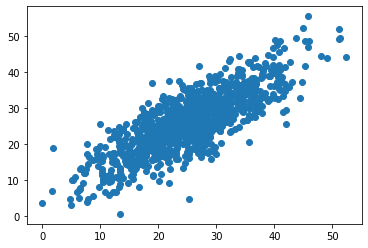

In [43]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [44]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [45]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [47]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [48]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [49]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred=regressor.predict(X_test)

In [79]:
# Finding the Coefs and intercept

# Equation of line is given by y=mx+b
# y=0.81*x + 5.50
# m ---> slope
# b ---> intercept

# X coefficient
print(regressor.coef_[0])

# Y intercept
print(regressor.intercept_)

0.8158440424972773
5.501254610359922


In [72]:
df_error=pd.DataFrame()
df_error['y_test']=y_train
df_error['y_test']=y_test
df_error.shape

(200, 1)

In [75]:
df_error

,y_test,y_pred
0,9.181877,23.283430
1,20.125978,24.210953
2,35.497177,35.448329
3,17.845446,16.451358
4,23.672849,21.009148
5,13.476262,21.655655
6,32.295027,24.591231
7,33.288836,29.428133
8,22.141440,27.702983
9,48.557684,38.973904


In [55]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.8357702979784576

In [56]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

23.487476979779686

In [57]:
# Root Mean Squared Error
mse=mean_squared_error(y_test,y_pred)

np.sqrt(mse)

4.846388034379799

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6366392208400573

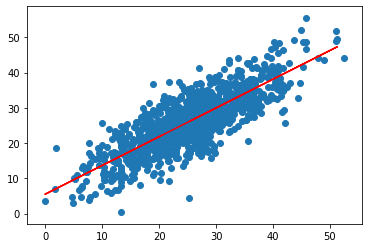

In [84]:
# Visualising the regression line
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])